<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Initializations" data-toc-modified-id="Initializations-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Initializations</a></span></li><li><span><a href="#Convergence-Analysis" data-toc-modified-id="Convergence-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Convergence Analysis</a></span><ul class="toc-item"><li><span><a href="#Convergence-Analysis-for-Mesh-refinement-and-variable-order-(k)" data-toc-modified-id="Convergence-Analysis-for-Mesh-refinement-and-variable-order-(k)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Convergence Analysis for Mesh refinement and variable order (k)</a></span><ul class="toc-item"><li><span><a href="#Mass-Matrix-Problem" data-toc-modified-id="Mass-Matrix-Problem-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Mass Matrix Problem</a></span></li><li><span><a href="#DG-and-HDG-vs-E-DG-and-E-HDG" data-toc-modified-id="DG-and-HDG-vs-E-DG-and-E-HDG-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>DG and HDG vs E-DG and E-HDG</a></span></li></ul></li><li><span><a href="#Convergence-Analysis-for-Mesh-refinement-and-variable-[order-(k),-bonus_int_order-(val)]" data-toc-modified-id="Convergence-Analysis-for-Mesh-refinement-and-variable-[order-(k),-bonus_int_order-(val)]-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Convergence Analysis for Mesh refinement and variable [order (k), bonus_int_order (val)]</a></span></li><li><span><a href="#Convergence-Analysis-for-Mesh-refinement-and-variable-[order-(k),-alpha-(a)]" data-toc-modified-id="Convergence-Analysis-for-Mesh-refinement-and-variable-[order-(k),-alpha-(a)]-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Convergence Analysis for Mesh refinement and variable [order (k), alpha (a)]</a></span></li></ul></li></ul></div>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import pandas as pd
from functools import reduce

### Initializations

In [68]:
%store -r dg 
%store -r hdg
%store -r mm 
%store -r emm_x 
%store -r emm_y 
%store -r emm_xy 
%store -r edg
%store -r ehdg
%store -r edg_val

### Convergence Analysis

#### Convergence Analysis for Mesh refinement and variable order (k)

In [99]:
dfs = [dg, hdg, mm, emm_x, emm_y, emm_xy, edg, ehdg]
dataframe = reduce(lambda left, right: pd.merge(left,right, on=['Order', 'Mesh Size']), dfs)

In [100]:
columns = ['Order', 'Mesh_Size', 'dg', 'hdg', 'mm', 'emm_x', 'emm_y', 'emm_xy', 'edg', 'ehdg']
dataframe.columns = columns

In [101]:
order_1 = dataframe[dataframe.Order.eq(1.0)]
order_2 = dataframe[dataframe.Order.eq(2.0)]
order_3 = dataframe[dataframe.Order.eq(3.0)]

##### Mass Matrix Problem

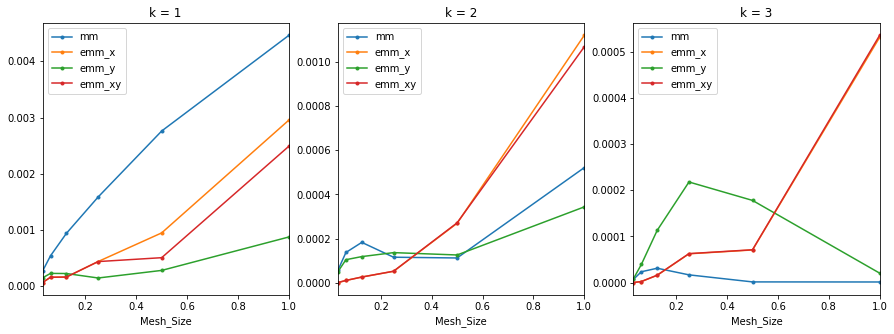

In [103]:
y = ['mm', 'emm_x', 'emm_y', 'emm_xy']
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
order_1.plot(x='Mesh_Size', y=y, ax=ax1, legend=True, title='k = 1', style='.-')
order_2.plot(x='Mesh_Size', y=y, ax=ax2, legend=True, title='k = 2', style='.-')
order_3.plot(x='Mesh_Size', y=y, ax=ax3, legend=True, title='k = 3', style='.-')

##### DG and HDG vs E-DG and E-HDG

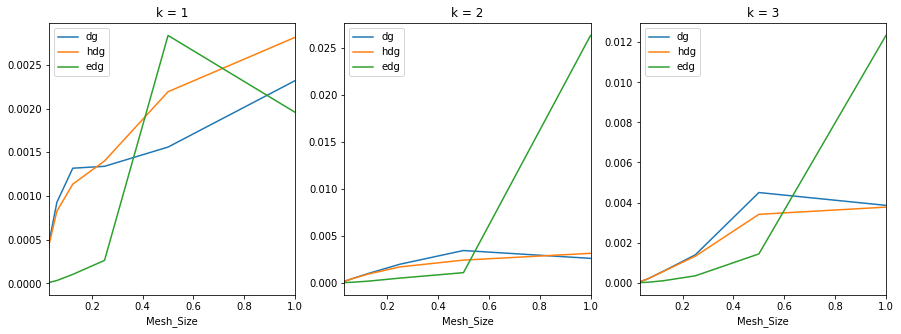

In [104]:
y = ['dg', 'hdg', 'edg']
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
order_1.plot(x='Mesh_Size', y=y, ax=ax1, legend=True, title='k = 1')
order_2.plot(x='Mesh_Size', y=y, ax=ax2, legend=True, title='k = 2')
order_3.plot(x='Mesh_Size', y=y, ax=ax3, legend=True, title='k = 3')

#### Convergence Analysis for Mesh refinement and variable [order (k), bonus_int_order (val)]

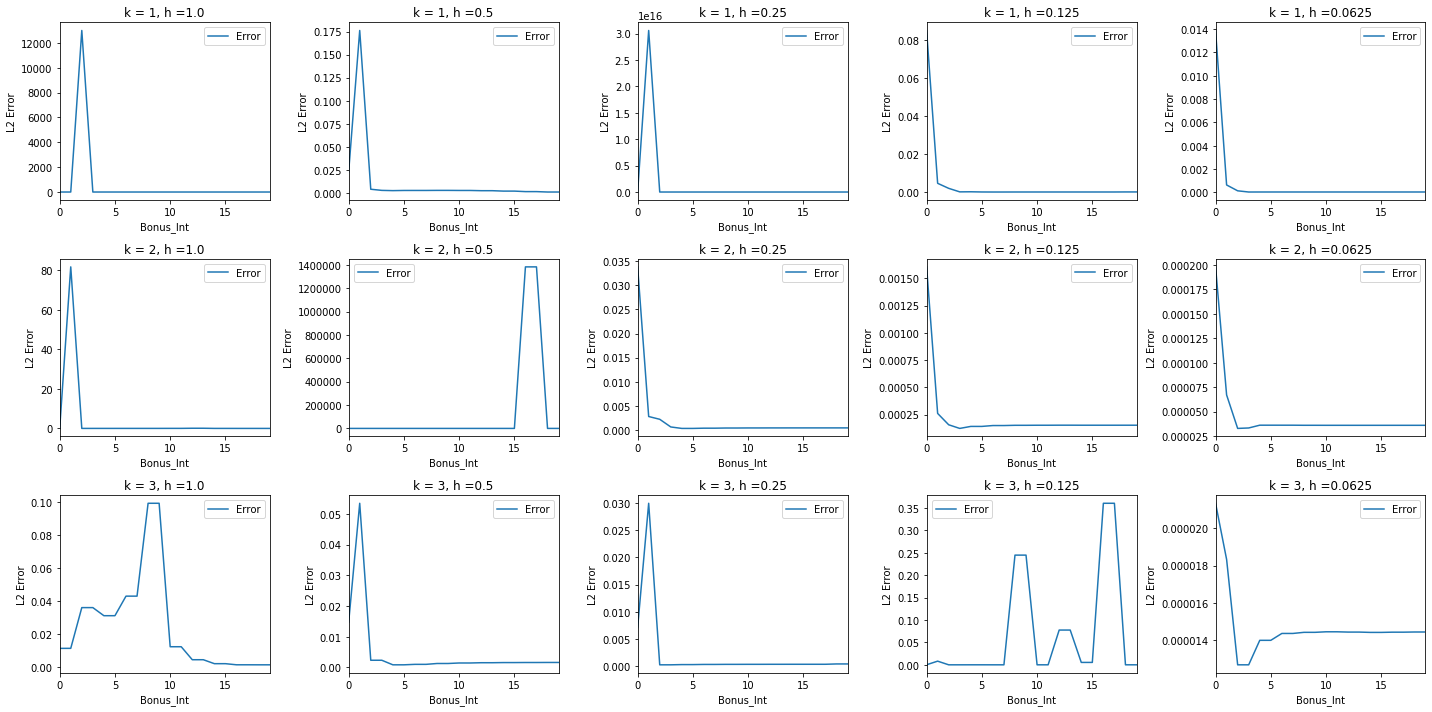

In [106]:
columns = ['Order', 'Bonus_Int', 'Mesh_Size', 'Error']
edg_val.columns = columns
orders =[1, 2, 3]
mesh_size = [1.0, 0.5, 0.25, 0.1250, 0.0625]

count=1
nrows = len(orders)
ncols = len(mesh_size)
plt.figure(figsize=(20,10))
           
for order in orders:
    for size in mesh_size:
        df = edg_val[edg_val.Order.eq(order) & edg_val.Mesh_Size.eq(size)]
        ax = plt.subplot(nrows, ncols, count)
        df.plot(x='Bonus_Int', y='Error', legend=True, ax=ax, title='k = ' + str(order) + ', h =' + str(size))
        ax.set_ylabel('L2 Error')
        count = count + 1
           
plt.tight_layout()              

#### Convergence Analysis for Mesh refinement and variable [order (k), alpha (a)]